In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

fashion_mnist_labels = [
    "T-shirt/top",    # class 0
    "Trouser",        # class 1
    "Pullover",       # class 2
    "Dress",          # class 3
    "Coat",           # class 4
    "Sandal",         # class 5
    "Shirt",          # class 6
    "Sneaker",        # class 7
    "Bag",            # class 8
    "Ankle boot"      # class 9
]


In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

print(y_train)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
[9 0 0 ... 3 0 5]


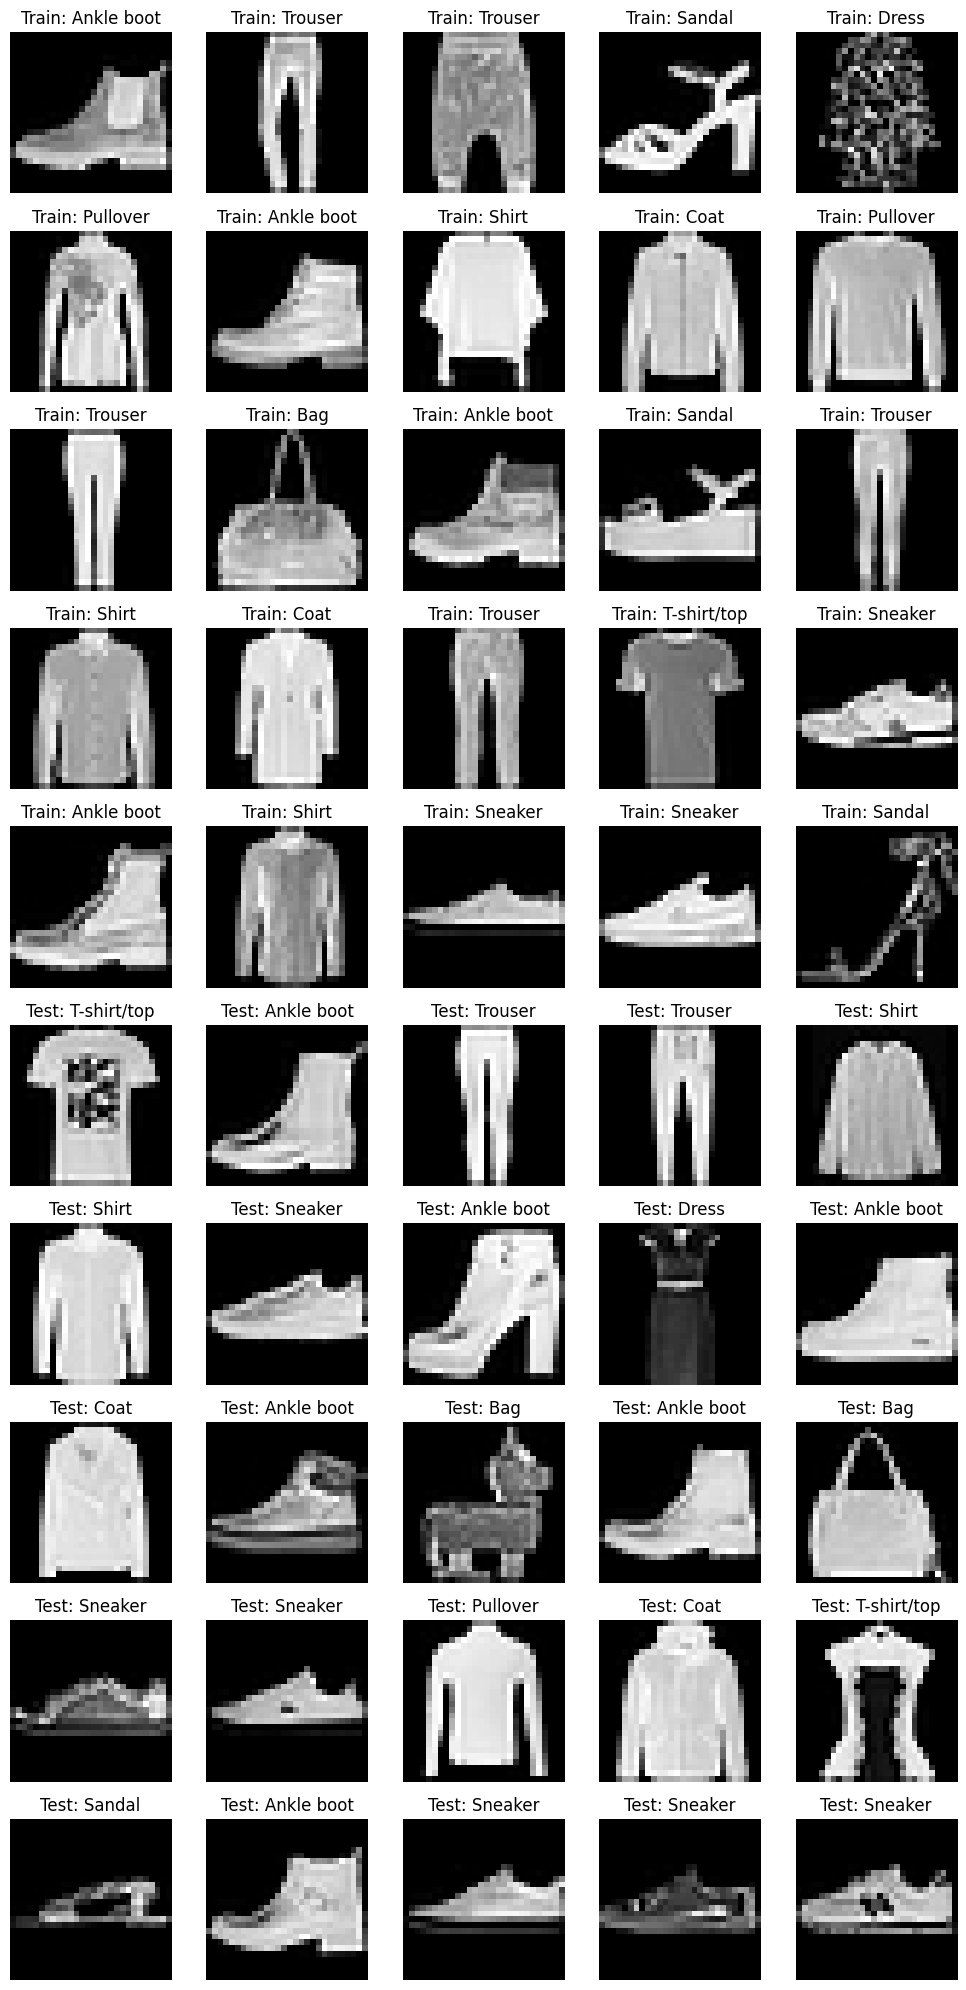

In [6]:
# Randomly select 25 training and 25 test images
num_samples = 25
train_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
test_indices = np.random.choice(x_test.shape[0], num_samples, replace=False)

train_images = x_train[train_indices].reshape(-1, 28, 28)
train_labels = y_train[train_indices]

test_images = x_test[test_indices].reshape(-1, 28, 28)
test_labels = y_test[test_indices]

# Plotting 10x10 grid: 5x5 training (top), 5x5 test (bottom)
fig, axs = plt.subplots(10, 5, figsize=(10, 20))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j
        axs[i, j].imshow(train_images[idx], cmap='gray')
        axs[i, j].set_title(f"Train: {fashion_mnist_labels[train_labels[idx]]}")
        axs[i, j].axis('off')

        axs[i + 5, j].imshow(test_images[idx], cmap='gray')
        axs[i + 5, j].set_title(f"Test: {fashion_mnist_labels[test_labels[idx]]}")
        axs[i + 5, j].axis('off')

plt.tight_layout()
plt.show()

In [7]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



d:\Visual Studio Code\AI_Classes_Aifalabs\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6830 - loss: 0.9857 - val_accuracy: 0.8048 - val_loss: 0.5546
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8248 - loss: 0.5065 - val_accuracy: 0.8176 - val_loss: 0.5053
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8429 - loss: 0.4490 - val_accuracy: 0.8410 - val_loss: 0.4522
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8509 - loss: 0.4225 - val_accuracy: 0.8457 - val_loss: 0.4440
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8601 - loss: 0.4006 - val_accuracy: 0.8499 - val_loss: 0.4322
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8656 - loss: 0.3836 - val_accuracy: 0.8492 - val_loss: 0.4227
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8672 - loss: 0.3711 - val_accuracy: 0.8543 - val_loss: 0.4125
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8731 - loss: 0.3590 - 

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Test accuracy: 86.38%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


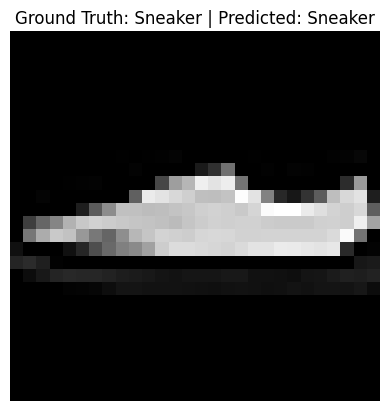

In [18]:
import random

# Pick a random test sample
index = random.randint(0, x_test.shape[0] - 1)
sample_image = x_test[index].reshape(1, 784)  # Flatten for model input
ground_truth = y_test[index]

# Predict the label
logits = model.predict(sample_image)
predicted_label = np.argmax(logits)

# Reshape back to 28x28 for visualization
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Ground Truth: {fashion_mnist_labels[ground_truth]} | Predicted: {fashion_mnist_labels[predicted_label]}")
plt.axis('off')
plt.show()
